In [1]:
import numpy as np
import cv2  # OpenCVライブラリ

import matplotlib.pyplot as plt 
%matplotlib inline

import torch

model="efficientdet"
backbone = "efficientnet-b0"
useBiFPN = True
HALF = False # enable FP16
DATASET = "COCO"
retina = False # for trying retinanets
scale = 2

# infer

In [2]:
from utils.efficientdet import EfficientDet
if not DATASET == "COCO":
    num_class = 21
else:
    num_class = 81

image_size = 512
    
if scale==1:
    ssd_cfg = {
        'num_classes': num_class,  # 背景クラスを含めた合計クラス数
        'input_size': 300*scale,  # 画像の入力サイズ
        'bbox_aspect_num': [4, 6, 6, 6, 4, 4],  # 出力するDBoxのアスペクト比の種類
        'feature_maps': [37, 18, 9, 5, 3, 1],  # 各sourceの画像サイズ
        'steps': [8, 16, 32, 64, 100, 300],  # DBOXの大きさを決める
        'min_sizes': [30, 60, 111, 162, 213, 264],  # DBOXの大きさを決める
        'max_sizes': [60, 111, 162, 213, 264, 315],  # DBOXの大きさを決める
        'aspect_ratios': [[2], [2, 3], [2, 3], [2, 3], [2], [2]],
    }
elif scale==2:
    ssd_cfg = {
        'num_classes': num_class,  # 背景クラスを含めた合計クラス数
        'input_size': 512,  # 画像の入力サイズ
        'bbox_aspect_num': [4, 6, 6, 6, 4, 4],  # 出力するDBoxのアスペクト比の種類
        'feature_maps': [64, 32, 16, 8, 4, 2],  # 各sourceの画像サイズ
        'steps': [8, 16, 32, 64, 100, 300],  # DBOXの大きさを決める
        'min_sizes': [30, 60, 111, 162, 213, 264]*scale,  # DBOXの大きさを決める
        'max_sizes': [60, 111, 162, 213, 264, 315]*scale,  # DBOXの大きさを決める
        'aspect_ratios': [[2], [2, 3], [2, 3], [2, 3], [2], [2]],
    }

# test if net works
net = EfficientDet(phase="inference", cfg=ssd_cfg, verbose=True, backbone=backbone, useBiFPN=useBiFPN)


Loaded pretrained weights for efficientnet-b0
EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dS

In [3]:
net_weights = torch.load('./weights/COCO_efficientnet-b0_600_BiFPN_50.pth',
                         map_location={'cuda:0': 'cpu'})
net.load_state_dict(net_weights)
print('loaded the trained weights')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("using:", device)
net = net.to(device)

loaded the trained weights
using: cuda:0


In [4]:
COCO_CLASSES = ('person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
                'train', 'truck', 'boat', 'traffic light', 'fire', 'hydrant',
                'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
                'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
                'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
                'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
                'kite', 'baseball bat', 'baseball glove', 'skateboard',
                'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
                'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
                'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
                'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
                'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
                'keyboard', 'cell phone', 'microwave oven', 'toaster', 'sink',
                'refrigerator', 'book', 'clock', 'vase', 'scissors',
                'teddy bear', 'hair drier', 'toothbrush')

cuda:0
./imgs/24071_20180420GENE01.jpg


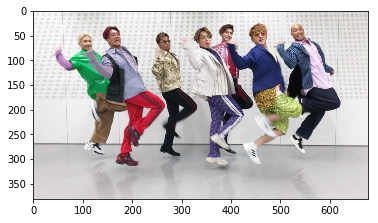

torch.Size([3, 512, 512])
layerc3: torch.Size([1, 40, 64, 64])
layerc4: torch.Size([1, 80, 32, 32])
layerc5: torch.Size([1, 320, 16, 16])
layer size: torch.Size([1, 256, 64, 64])
layer size: torch.Size([1, 256, 32, 32])
layer size: torch.Size([1, 256, 16, 16])
layer size: torch.Size([1, 256, 8, 8])
layer size: torch.Size([1, 256, 4, 4])
layer size: torch.Size([1, 256, 2, 2])


/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:2457: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


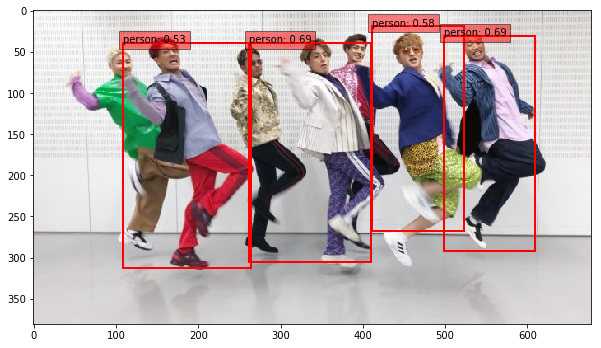

./imgs/sample2.JPG


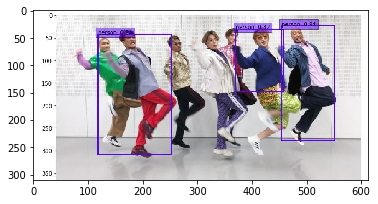

torch.Size([3, 512, 512])
layerc3: torch.Size([1, 40, 64, 64])
layerc4: torch.Size([1, 80, 32, 32])
layerc5: torch.Size([1, 320, 16, 16])
layer size: torch.Size([1, 256, 64, 64])
layer size: torch.Size([1, 256, 32, 32])
layer size: torch.Size([1, 256, 16, 16])
layer size: torch.Size([1, 256, 8, 8])
layer size: torch.Size([1, 256, 4, 4])
layer size: torch.Size([1, 256, 2, 2])


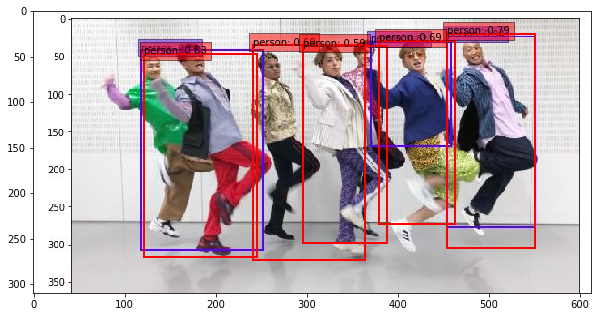

./imgs/a.jpg


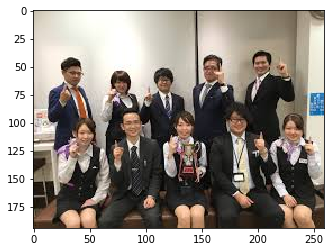

torch.Size([3, 512, 512])
layerc3: torch.Size([1, 40, 64, 64])
layerc4: torch.Size([1, 80, 32, 32])
layerc5: torch.Size([1, 320, 16, 16])
layer size: torch.Size([1, 256, 64, 64])
layer size: torch.Size([1, 256, 32, 32])
layer size: torch.Size([1, 256, 16, 16])
layer size: torch.Size([1, 256, 8, 8])
layer size: torch.Size([1, 256, 4, 4])
layer size: torch.Size([1, 256, 2, 2])


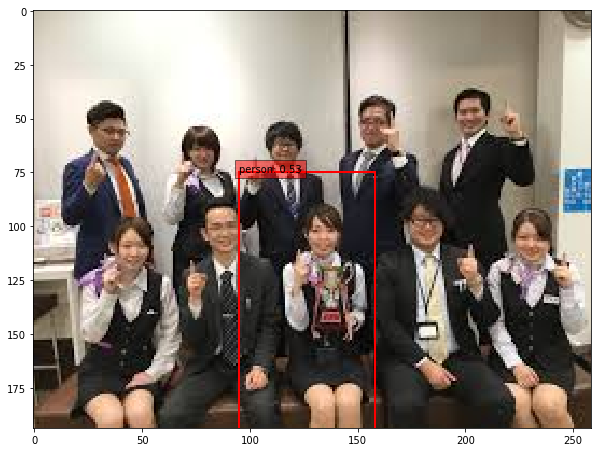

./imgs/syuugou01.jpg


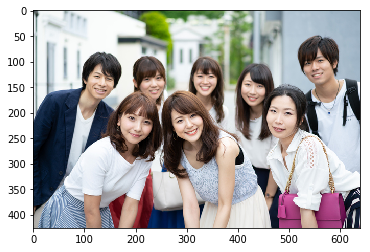

torch.Size([3, 512, 512])
layerc3: torch.Size([1, 40, 64, 64])
layerc4: torch.Size([1, 80, 32, 32])
layerc5: torch.Size([1, 320, 16, 16])
layer size: torch.Size([1, 256, 64, 64])
layer size: torch.Size([1, 256, 32, 32])
layer size: torch.Size([1, 256, 16, 16])
layer size: torch.Size([1, 256, 8, 8])
layer size: torch.Size([1, 256, 4, 4])
layer size: torch.Size([1, 256, 2, 2])


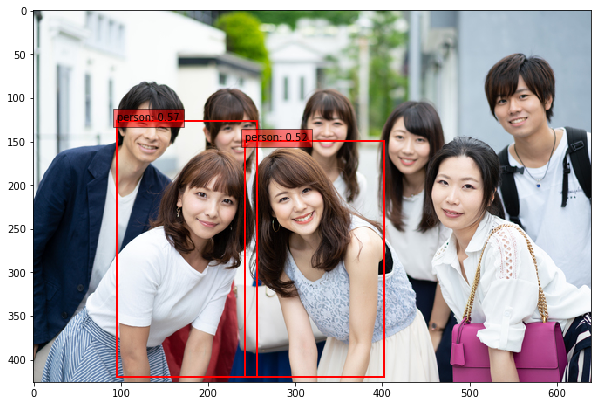

./imgs/EZ6I1552_-720x480.jpg


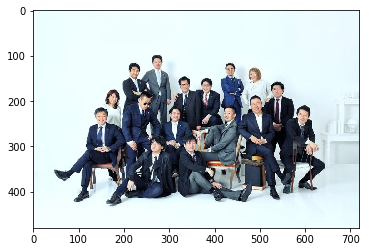

torch.Size([3, 512, 512])
layerc3: torch.Size([1, 40, 64, 64])
layerc4: torch.Size([1, 80, 32, 32])
layerc5: torch.Size([1, 320, 16, 16])
layer size: torch.Size([1, 256, 64, 64])
layer size: torch.Size([1, 256, 32, 32])
layer size: torch.Size([1, 256, 16, 16])
layer size: torch.Size([1, 256, 8, 8])
layer size: torch.Size([1, 256, 4, 4])
layer size: torch.Size([1, 256, 2, 2])


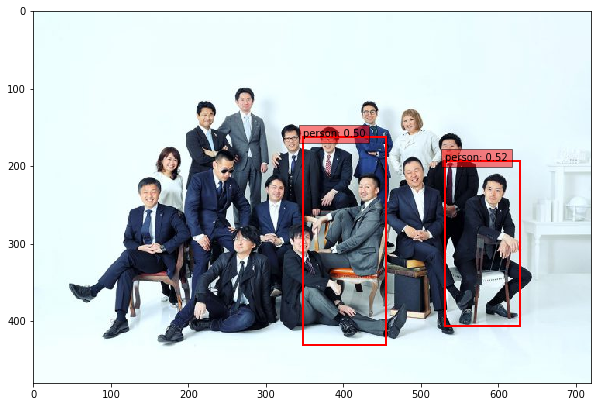

./imgs/main.jpg


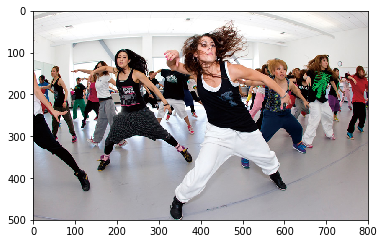

torch.Size([3, 512, 512])
layerc3: torch.Size([1, 40, 64, 64])
layerc4: torch.Size([1, 80, 32, 32])
layerc5: torch.Size([1, 320, 16, 16])
layer size: torch.Size([1, 256, 64, 64])
layer size: torch.Size([1, 256, 32, 32])
layer size: torch.Size([1, 256, 16, 16])
layer size: torch.Size([1, 256, 8, 8])
layer size: torch.Size([1, 256, 4, 4])
layer size: torch.Size([1, 256, 2, 2])


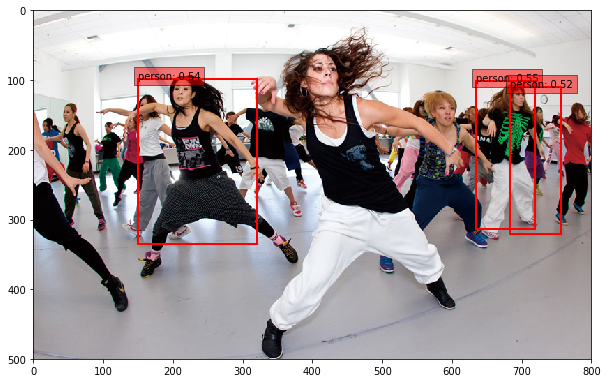

./imgs/b.jpg


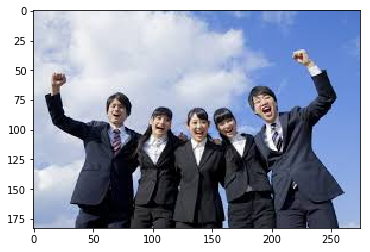

torch.Size([3, 512, 512])
layerc3: torch.Size([1, 40, 64, 64])
layerc4: torch.Size([1, 80, 32, 32])
layerc5: torch.Size([1, 320, 16, 16])
layer size: torch.Size([1, 256, 64, 64])
layer size: torch.Size([1, 256, 32, 32])
layer size: torch.Size([1, 256, 16, 16])
layer size: torch.Size([1, 256, 8, 8])
layer size: torch.Size([1, 256, 4, 4])
layer size: torch.Size([1, 256, 2, 2])


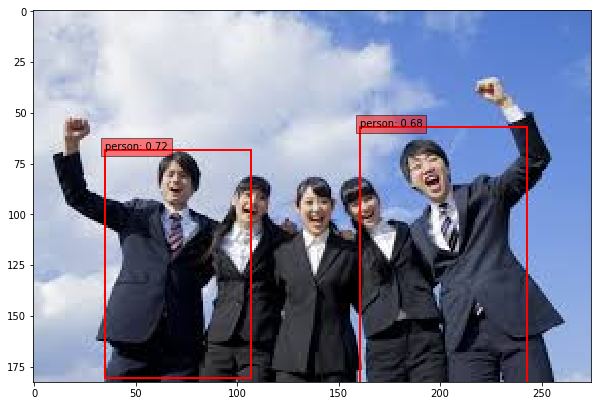

./imgs/img_2cff4a19be74dcd1bc1d54855bd3ec4d207066.jpg


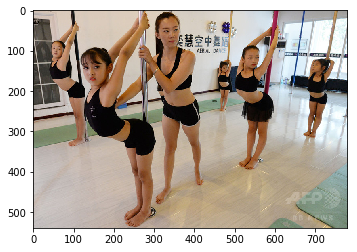

torch.Size([3, 512, 512])
layerc3: torch.Size([1, 40, 64, 64])
layerc4: torch.Size([1, 80, 32, 32])
layerc5: torch.Size([1, 320, 16, 16])
layer size: torch.Size([1, 256, 64, 64])
layer size: torch.Size([1, 256, 32, 32])
layer size: torch.Size([1, 256, 16, 16])
layer size: torch.Size([1, 256, 8, 8])
layer size: torch.Size([1, 256, 4, 4])
layer size: torch.Size([1, 256, 2, 2])


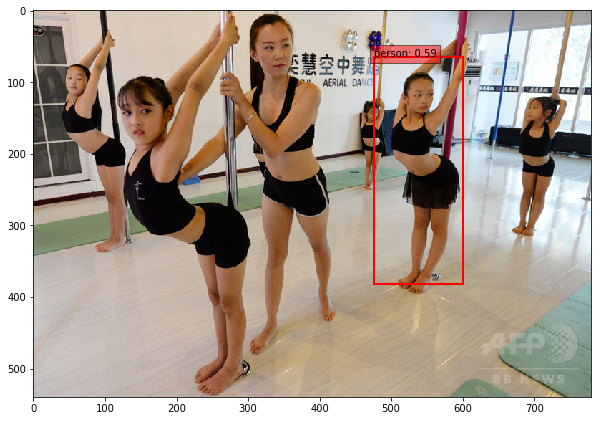

./imgs/TWICE35.jpg


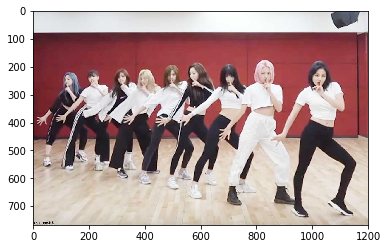

torch.Size([3, 512, 512])
layerc3: torch.Size([1, 40, 64, 64])
layerc4: torch.Size([1, 80, 32, 32])
layerc5: torch.Size([1, 320, 16, 16])
layer size: torch.Size([1, 256, 64, 64])
layer size: torch.Size([1, 256, 32, 32])
layer size: torch.Size([1, 256, 16, 16])
layer size: torch.Size([1, 256, 8, 8])
layer size: torch.Size([1, 256, 4, 4])
layer size: torch.Size([1, 256, 2, 2])


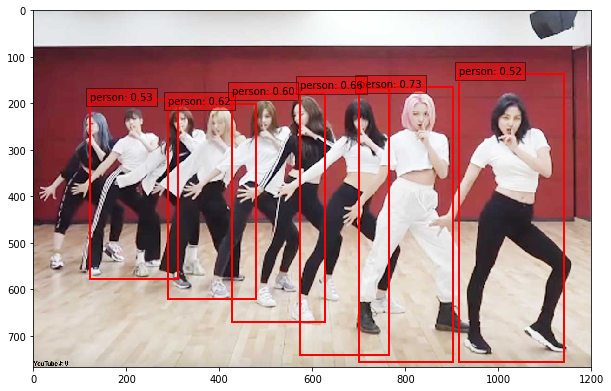

./imgs/AS20190821003362_commL.jpg


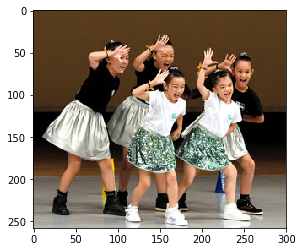

torch.Size([3, 512, 512])
layerc3: torch.Size([1, 40, 64, 64])
layerc4: torch.Size([1, 80, 32, 32])
layerc5: torch.Size([1, 320, 16, 16])
layer size: torch.Size([1, 256, 64, 64])
layer size: torch.Size([1, 256, 32, 32])
layer size: torch.Size([1, 256, 16, 16])
layer size: torch.Size([1, 256, 8, 8])
layer size: torch.Size([1, 256, 4, 4])
layer size: torch.Size([1, 256, 2, 2])


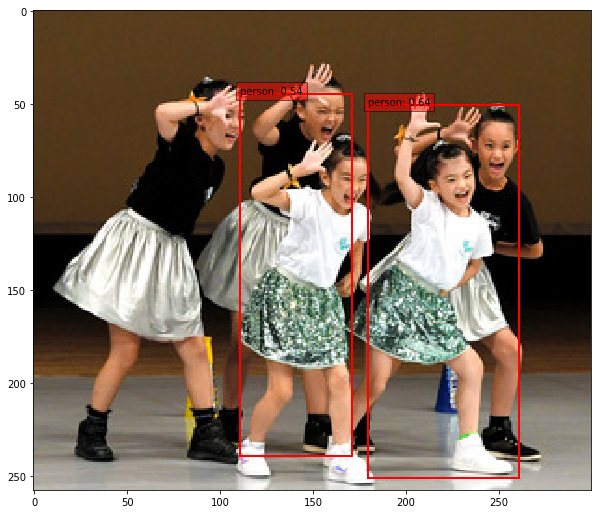

./imgs/1.png


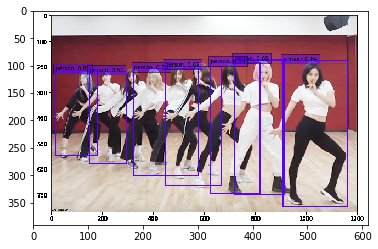

torch.Size([3, 512, 512])
layerc3: torch.Size([1, 40, 64, 64])
layerc4: torch.Size([1, 80, 32, 32])
layerc5: torch.Size([1, 320, 16, 16])
layer size: torch.Size([1, 256, 64, 64])
layer size: torch.Size([1, 256, 32, 32])
layer size: torch.Size([1, 256, 16, 16])
layer size: torch.Size([1, 256, 8, 8])
layer size: torch.Size([1, 256, 4, 4])
layer size: torch.Size([1, 256, 2, 2])


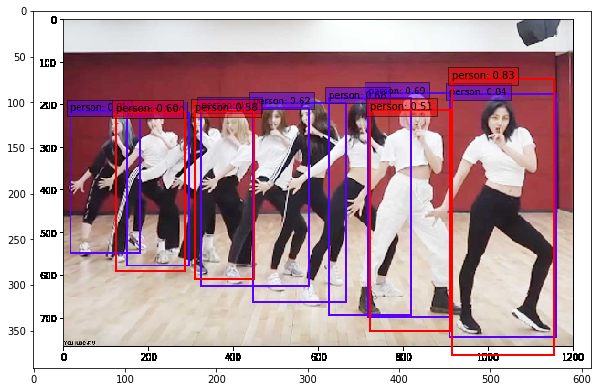

In [5]:
from utils.ssd_model import DataTransform
import glob
# 画像に対する予測
from utils.ssd_predict_show import SSDPredictShow
# 1. 画像読み込み
#image_file_path = "../../VOCdevkit/VOC2007/JPEGImages/009961.jpg"
image_file_path = "./imgs/*"

ssd = SSDPredictShow(eval_categories=COCO_CLASSES, net=net, device=device, image_size=image_size)

for imp in glob.glob(image_file_path):
    print(imp)
    img = cv2.imread(imp)  # [高さ][幅][色BGR]
    height, width, channels = img.shape  # 画像のサイズを取得

    # 2. 元画像の表示
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
    ssd.show(imp, data_confidence_level=0.5)
    plt.show()
